# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [86]:
airbnb = pd.read_csv('/content/airbnb_hw.csv', low_memory=False)
airbnb_df = pd.DataFrame(airbnb)

#The price values greater than 999 turn into strings.
#Therefore, we have to remove the comma in every value which is greater than 999
#and turn them into numeric values.
#In the last step we can check how many NaN values we have in price and we
#received 0, therefore we have a perfectly clean Price column.


airbnb_df['Price'] = airbnb_df['Price'].replace(r'[\$,]', '', regex=True)
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce')

missing_values = airbnb_df['Price'].isna().sum()
print(missing_values)

ascedning_price = airbnb_df.sort_values(by="Price", ascending=True)
print(ascedning_price['Price'].tail(10))


0
4003      4500
3483      4750
24136     5000
1275      5000
7550      5000
15633     5000
2405      5999
17900     6500
4002      8000
23927    10000
Name: Price, dtype: int64


In [91]:
injury = pd.read_csv('/content/mn_police_use_of_force.csv')
injury_df = pd.DataFrame(injury)
injury_df.replace('', np.nan, inplace=True)

missing_values1 = injury_df['subject_injury'].isna().sum()
n_rows = injury_df['subject_injury'].shape[0]
print(missing_values1/n_rows)
#Circa 76% of the column subject_injury is missing.
#This is a big concern because it could be because people who got injured
#feel uncomfortable answering the question,
#or maybe it's another reason but we can't just ignore these missing values.

cross_tab = pd.crosstab(injury_df['subject_injury'], injury_df['force_type'], dropna=False, normalize='all') * 100
print(cross_tab)

0.7619342359767892
force_type         Baton  Bodily Force  Chemical Irritant   Firearm  \
subject_injury                                                        
No              0.000000      8.456480           1.013540  0.015474   
Yes             0.015474      9.949710           0.317215  0.000000   
NaN             0.015474     54.553191          10.994197  0.000000   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                       0.255319           0.263056     0.000000   
Yes                      0.340426           0.309478     0.000000   
NaN                      0.208897           0.572534     0.673114   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                            0.007737                      0.00000   
Yes                           0.015474                      0.0000

A lot of data is missing when bodily force was used. In general, when "less-severe" force was used there seems to be missing data but when "severe" force was used there seems to be almost no missing data

In [97]:
justice = pd.read_parquet('/content/justice_data.parquet')
justice_df = pd.DataFrame(justice)
justice_df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [103]:
injury_df.replace('', np.nan, inplace=True)
justice_df["WhetherDefendantWasReleasedPretrial"] = justice_df["WhetherDefendantWasReleasedPretrial"].replace({1: "Released", 0: "Not Released", 9: "Unknown"})
justice_df["WhetherDefendantWasReleasedPretrial"] = justice_df["WhetherDefendantWasReleasedPretrial"].fillna("Unknown")
print(justice_df["WhetherDefendantWasReleasedPretrial"].value_counts())

WhetherDefendantWasReleasedPretrial
Released        19154
Not Released     3801
Unknown            31
Name: count, dtype: int64


In [109]:
justice_df["ImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(justice_df["ImposedSentenceAllChargeInContactEvent"], errors="coerce")
justice_df["ImposedSentenceAllChargeInContactEvent"] = justice_df["ImposedSentenceAllChargeInContactEvent"].round()
justice_df["ImposedSentenceAllChargeInContactEvent"] = justice_df["ImposedSentenceAllChargeInContactEvent"].fillna(0)
print(justice_df["ImposedSentenceAllChargeInContactEvent"].head(15))


0       0.0
1      60.0
2      12.0
3       1.0
4       0.0
5      12.0
6      36.0
7       6.0
8      24.0
9      12.0
10      6.0
11      0.0
12      0.0
13    120.0
14     24.0
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64


First I changed all the values to numeric values and make sure to replace invalid values with NaN.
Then I rounded the values to make them cleaner and easier to read. When there was a missing value, I filled it with 0, showing that no sentence was imposed or that there is a missing value

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [42]:
shark_data = pd.read_excel('/content/GSAF5.xls')
df_shark = pd.DataFrame(shark_data)
df_shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_shark = df_shark.drop(columns=["pdf", "href formula", "href", "Case Number", "Case Number.1", "original order", "Unnamed: 21", "Unnamed: 22"])
df_shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...


In [37]:
df_shark["Year"] = pd.to_numeric(df_shark["Year"]).dropna().round().astype(int)
descending_shark = df_shark.sort_values(by="Year", ascending=False)
print(descending_shark.tail(1))
print(descending_shark.head(1))
#The range is from the year NaN till the year 2026.0 which doesn't really make sense because we are in 2026.



                      Date  Year        Type  Country       State    Location  \
6761  Reported 19-Aug-1836   NaN  Unprovoked  ENGLAND  Cumberland  Whitehaven   

      Activity   Name Sex  Age Injury Fatal Y/N Time Species           Source  
6761  Swimming  a boy   M  NaN  FATAL         Y  NaN      NaN  C. Moore, GSAF  
                   Date    Year        Type Country  State  \
27  2024-07-04 00:00:00  2026.0  Unprovoked     USA  Texas   

              Location  Activity            Name Sex Age              Injury  \
27  South Padre Island  Swimming  Victoria Ramos   F  18  Minor cuts to calf   

   Fatal Y/N Time    Species           Source  
27         N    ?  6 ft shark  Valley Central  


In [39]:
df_shark_year = df_shark[(df_shark["Year"] >= 1940) & (df_shark["Year"] <= 2025)]
df_shark_year_size = df_shark_year.groupby("Year").size()
df_shark_year_size.head(5)

,0
Year,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31


In [40]:
df_shark_year_size.tail(5)

,0
Year,
2021.0,109
2022.0,98
2023.0,109
2024.0,49
2025.0,6


It seems to be increasing, in the 1950s there were only 30ish and now there are around 80ish



<Axes: xlabel='Age', ylabel='Count'>

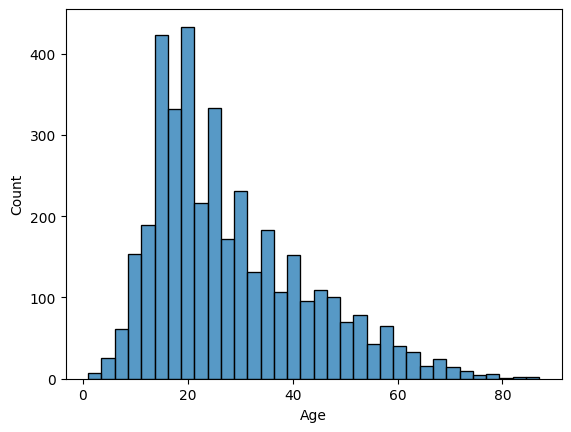

In [43]:
df_shark["Age"] = pd.to_numeric(df_shark["Age"], errors="coerce").dropna().astype(int)

sns.histplot(df_shark["Age"])

In [65]:
df_shark['Sex'] = df_shark['Sex'].where(df_shark['Sex'].isin(['M', 'F']))
total_victims = len(df_shark[df_shark['Sex'].isin(['M', 'F'])])
male_victims = len(df_shark[df_shark['Sex'] == 'M'])
print(male_victims/total_victims)

0.8763466042154566


In [47]:
print(df_shark['Type'].unique())

['Unprovoked' 'Provoked' ' Provoked' 'Questionable' 'Watercraft'
 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat']


In [50]:
df_shark['Type'] = df_shark['Type'].str.strip()
df_shark['Type'] = df_shark['Type'].where(df_shark['Type'].isin(['Unprovoked', 'Provoked']), 'Unknown')
print(df_shark['Type'].unique())

['Unprovoked' 'Provoked' 'Unknown']


In [52]:
total_type = len(df_shark[df_shark['Type'].isin(['Unprovoked', 'Provoked'])])
type_unprovoked = len(df_shark[df_shark['Type'] == 'Unprovoked'])
print(type_unprovoked / total_type)

0.8896754143646409


In [53]:
print(df_shark['Fatal Y/N'].unique())

['N' 'Y' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N' 'N ' 'y']


In [61]:
df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].astype(str).str.strip().str.upper()
df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].replace({
    'N': 'N', 'Y': 'Y', 'NQ': 'Unknown', 'Y X 2': 'Unknown', 'F': 'Unknown',
    'M': 'Unknown', 'UNKNOWN': 'Unknown', 'NAN': 'Unknown', '2017': 'Unknown', 'N ': 'N'
})
print(df_shark['Fatal Y/N'].unique())

['N' 'Y' 'Unknown']


In [69]:
crosstab_counts = pd.crosstab(df_shark['Sex'], df_shark['Type'], margins=True, margins_name='Total')
crosstab_percentages = crosstab_counts.div(crosstab_counts.loc['Total'], axis=1) * 100
print(crosstab_percentages)

crosstab_fatal_counts = pd.crosstab(df_shark['Fatal Y/N'], df_shark['Type'], margins=True, margins_name='Total')
crosstab_fatal_percentages = crosstab_fatal_counts.div(crosstab_fatal_counts.loc['Total'], axis=1) * 100
print(crosstab_fatal_percentages)

crosstab_fatal_sex_counts = pd.crosstab(df_shark['Fatal Y/N'], df_shark['Sex'], margins=True, margins_name='Total')
crosstab_fatal_sex_percentages = crosstab_fatal_sex_counts.div(crosstab_fatal_sex_counts.loc['Total'], axis=1) * 100
print(crosstab_fatal_sex_percentages)

Type     Provoked     Unknown  Unprovoked      Total
Sex                                                 
F        5.354059   10.769231   13.451114   12.36534
M       94.645941   89.230769   86.548886   87.63466
Total  100.000000  100.000000  100.000000  100.00000
Type         Provoked     Unknown  Unprovoked       Total
Fatal Y/N                                                
N           95.305164   37.416667   74.189792   69.808352
Unknown      1.408451   46.250000    1.513681    9.181922
Y            3.286385   16.333333   24.296526   21.009725
Total      100.000000  100.000000  100.000000  100.000000
Sex                 F           M       Total
Fatal Y/N                                    
N           76.010101   69.730982   70.507416
Unknown      8.838384    8.177445    8.259173
Y           15.151515   22.091573   21.233411
Total      100.000000  100.000000  100.000000


Sharks are much more likley to launch Unprovoked attacks on Woman. The attack is more likley to be fatal when it is unprovoked which is confusing at first but makes sense because if you get suprised you pribably can't defend yourslef nor runaway. It is more likley to be a fatal attack for males. I was always terrfiied of sharks till I found out more people die because they are laying under a plam tree and get hit by a coconut...

In [75]:
df_shark["Species "] = df_shark["Species "].str.strip().str.split().str[0].str.capitalize()
white_shark_attacks = (df_shark["Species "] == "White").sum() / len(df_shark)
print(white_shark_attacks)

0.0710812356979405


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. It's about how improtant data cleaning is and it tackles small but important aspects of data cleaning: data tidying.
2. The tidy data standard is meant to organize data in a simple and unified way, so it is easier to work with.
3. Tidy datasets are all organized the same way and are therefore easy to understand. But messy datasets are confusing and often hard to understand and ervery one is messy in its own way.//
It's often easy to tell what observations and variables are in a given dataset but it's hard/impossible to come up with a rule which applies to every dataset.
4. Values: Individual datapoints, can be numbers or text. Variables: Contains all the values which messeaure the same variable. Observations: Contains all the messuarements collected for a single entitiy across all attributes.
5. Tidy data is a standard way of mapping the meaning of a dataset to its structure. Each variable forms a column. Each observation forms a row. Each type of observational unit forms a table.
6. Column headers are values, not variable names. Multiple variables are stored in one column. Variables are stored in both rows and columns. Multiple types of observational units are stored in the same table. A single observational unit is stored in multiple tables.
The column headers should represent variable names, not data values. Changing a wide format, lots of columns, to a long format, more rows less columns.
7. 11 is messy because it combines multiple variables in columns. 12 on the other hand is tidy, because it turns the variables in columns into rows.
8. The problem is that tidy data is only helpful if there are tools to work with, BUT these tools can only help if the data is already somewhat tidy. Wickham hopes that in the future there are better tools to organize and work with data.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?